<a href="https://colab.research.google.com/github/god-data-unimib/DS_LAB_ECONOMICS_FOR_DS/blob/main/Analisi_Descrittiva_%20DEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap
from pylab import rcParams

# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

In [35]:
url = 'https://raw.githubusercontent.com/god-data-unimib/DS_LAB_ECONOMICS_FOR_DS/main/dataset1/telecom_users.csv'

In [36]:
df = pd.read_csv(url, index_col=0)

In [67]:
# Data to plot
sizes = df['Churn'].value_counts(sort = True)
colors = ["aquamarine","pink"] 
rcParams['figure.figsize'] = 5,5
explode = (0, 0.1)
labels = 'No', 'Yes'

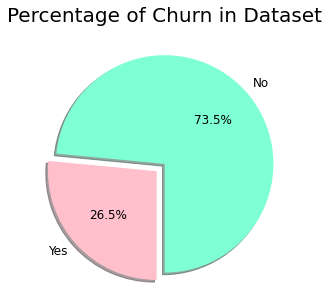

In [68]:
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

### Analysis of numeric variables

In [37]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [38]:
numerics = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [39]:
numerics

,tenure,MonthlyCharges,TotalCharges
1869,72,24.10,1734.65
4528,44,88.15,3973.20
6344,38,74.95,2869.85
6739,4,55.90,238.50
432,2,53.45,119.50
...,...,...,...
3772,1,95.00,95.00
5191,23,91.10,2198.30
5226,12,21.15,306.05
5390,12,99.45,1200.15


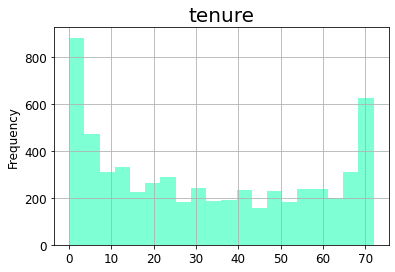

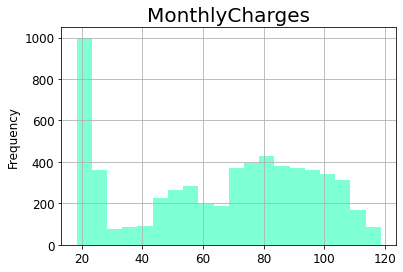

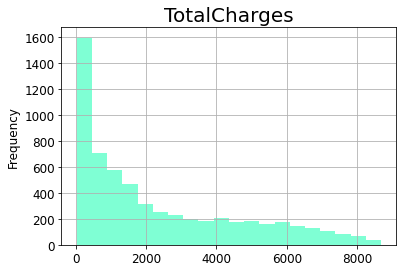

In [40]:
# plot numerical distributions
cm = plt.cm.get_cmap('RdYlBu_r')
bins =20

for f in numerics:
    df[f].plot(kind='hist', bins=20, color = ['aquamarine'])
    plt.title(f)
    plt.grid()
    plt.show()

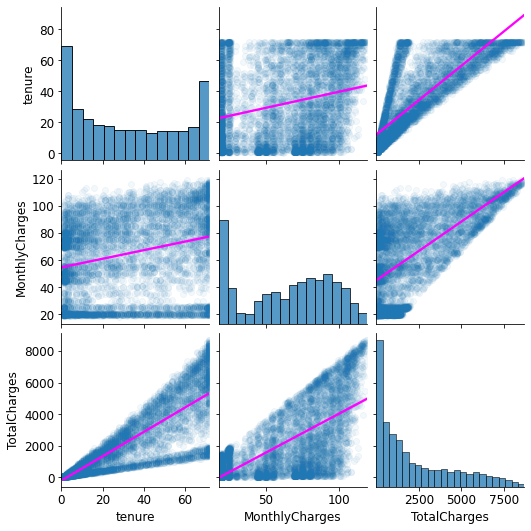

In [41]:
# pairwise scatter plot
sns.pairplot(numerics, 
             kind='reg', 
             plot_kws={'line_kws':{'color':'magenta'}, 'scatter_kws': {'alpha': 0.05}})
plt.show()

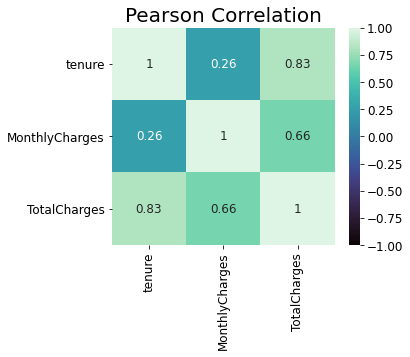

In [42]:
# Pearson (linear) correlation
corr_pearson = numerics.corr(method='pearson')

fig = plt.figure(figsize = (5,4))
sns.heatmap(corr_pearson, annot=True, cmap='mako', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

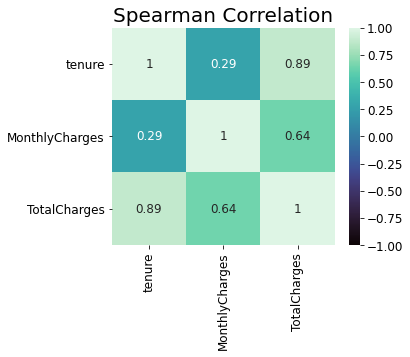

In [43]:
# Spearman (Rank) correlation
corr_spearman = numerics.corr(method='spearman')

fig = plt.figure(figsize = (5,4))
sns.heatmap(corr_spearman, annot=True, cmap='mako', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

As we would expect, Monthly Charges and Total Charges seem to have some positive correlation going on. Anyway, the most significant result is given by the strong positive correlation existing between tenure and Total Charges, meaning that  as tenure increases so does total charges.

In [44]:
# Create column ChurnVal with - Yes = 1 and No = 0
churn_mapping = {"No": 0, "Yes": 1}
df['ChurnVal'] = df['Churn'].map(churn_mapping)

#### Monthly Charges

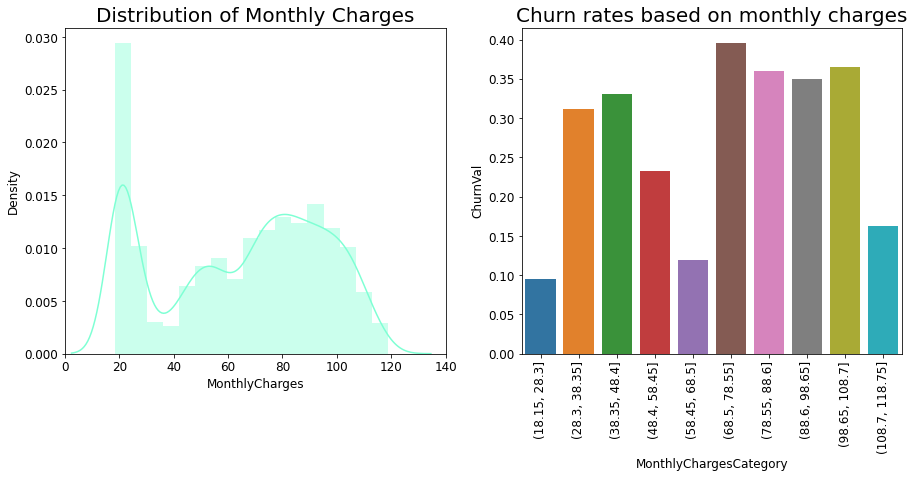

In [58]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

# Plot MonthlyCharges occurance
sns.distplot(df.MonthlyCharges, color='aquamarine', ax=axes1)
axes1.set_title('Distribution of Monthly Charges')
axes1.set_xlim(0,140)

# Categorize MonthlyCharges into bins and plot
df['MonthlyChargesCategory'] = pd.cut(df["MonthlyCharges"], bins=10)
sns.barplot(x='MonthlyChargesCategory', y='ChurnVal', data=df, ci=None, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title('Churn rates based on monthly charges')

plt.show()

From the distriubution of Monthly Charges we infer that a huge number of customers use very cheap plans (between USD 18 to USD 30). Interstingly, churn rate among them is least as well.
While the observed churn rate is very high among high spender customers, typically between USD 70 to USD 100 per month.


#### Total Charges
Demonstration that Total Charges equals tenure * Monthly Charges

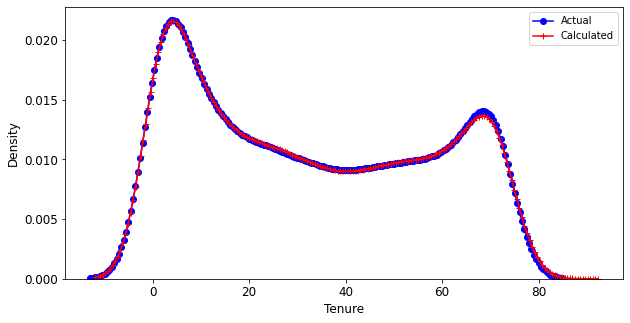

In [46]:
tenure_calc = df.TotalCharges/df.MonthlyCharges
fig, axes = plt.subplots(figsize=(10,5))
sns.kdeplot(df.tenure, marker='o', c='b', label="Actual", ax=axes)
sns.kdeplot(tenure_calc, marker='+', c='r', label="Calculated", ax=axes)
axes.set_xlabel('Tenure')
axes.legend()
plt.show()

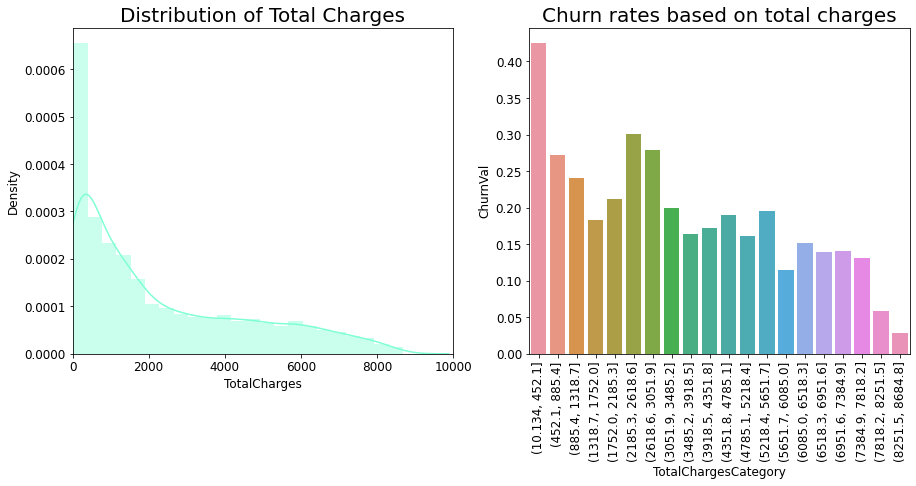

In [48]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

# Plot TotalCharges occurance
sns.distplot(df.TotalCharges, color='aquamarine', ax=axes1)
axes1.set_title('Distribution of Total Charges')
axes1.set_xlim(0,10000)

# Categorize TotalCharges into bins and plot
df['TotalChargesCategory'] = pd.cut(df["TotalCharges"], bins=20)
sns.barplot(x='TotalChargesCategory', y='ChurnVal', data=df, ci=None, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title('Churn rates based on total charges')

plt.show()

#### Tenure

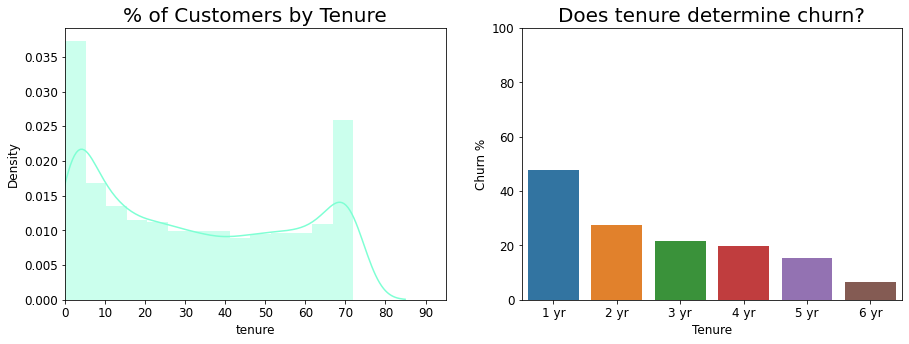

In [88]:
# Divide the tenure into bins
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 yr', '2 yr', '3 yr', '4 yr', '5 yr', '6 yr']
df['tenureGroup'] = pd.cut(df["tenure"], bins, labels=labels)

fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,5))

# Plot tenure occurance
sns.distplot(df.tenure, color='aquamarine', ax=axes1)
axes1.set_title('% of Customers by Tenure')
axes1.set_xticks(np.arange(0, 100, 10))
axes1.set_xlim(0,95)

# Draw a bar plot of tenure vs churn
sns.barplot(x="tenureGroup", y=df.ChurnVal*100, data=df, ci=None, ax=axes2)
axes2.set_xlabel('Tenure')
axes2.set_ylabel('Churn %')
axes2.set_ylim(0,100)
axes2.set_title('Does tenure determine churn?')


plt.show()


We divided the customer tenure into categories as - 1 year, 2 years to 6 years. It is apparent that newly acquired customers tend to churn more (~almost 50% of customers who have subscribed within last 1 years have left).
As customer tenure increases, the chance of churn decreases accordingly.
**This means that the company should work on retaining the newly acquired customers.**

### Analysis of Categorical Variables

#### Gender

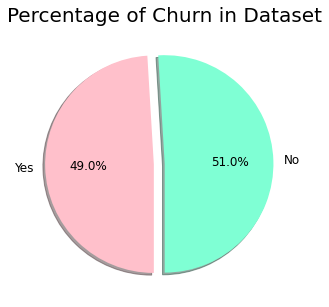

In [90]:
sizes = df['gender'].value_counts(sort = True)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

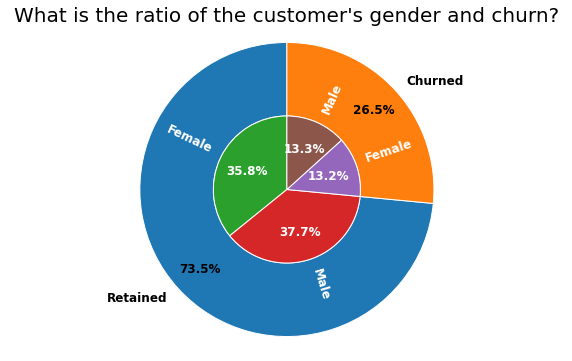

In [93]:
fig, axes2 = plt.subplots(figsize=(10,6))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data = df.Churn.value_counts().sort_index()
axes2.pie(
    data,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data = df.groupby(["Churn", "gender"]).size().reset_index()
axes2.pie(
    data.iloc[:,2], 
    labels=list(data.gender),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s gender and churn?')
#axes2.legend(loc='best', bbox_to_anchor=(1,1))
axes2.axis('equal')

plt.show()

#### Senior Citizenship

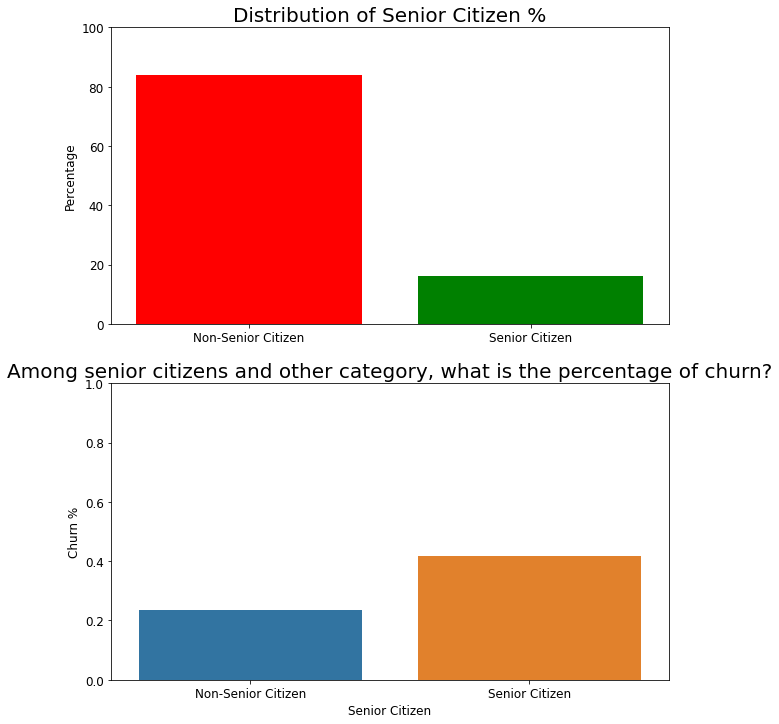

In [102]:
fig, (axes1, axes2) = plt.subplots(2, 1, figsize=(10,12))

# Plot distribution of SeniorCitizen data
data = df["SeniorCitizen"].value_counts(normalize=True).sort_index()
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Senior Citizen %')
axes1.set_ylabel('Percentage')
axes1.set_xticks([0, 1])
axes1.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
axes1.set_ylim(0,100)

# Chances of churn based on gender
sns.barplot(x="SeniorCitizen", y="ChurnVal", data=df, ci=None, ax=axes2)
axes2.set_xlabel('Senior Citizen')
axes2.set_ylabel('Churn %')
axes2.set_title('Among senior citizens and other category, what is the percentage of churn?')
axes2.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
axes2.set_ylim(0,1)

plt.show()

Majority of the customers in dataset are Non-Senior Citizens (> 80%).
Out of all senior citizen customers, more than 40% churned. While among younder customers, the churn percentage is less than 25%.
Hence, senior citizens tend to churn more than younger customers.
Thus, SeniorCitizen and Churn features seem to be related.

#### Partner

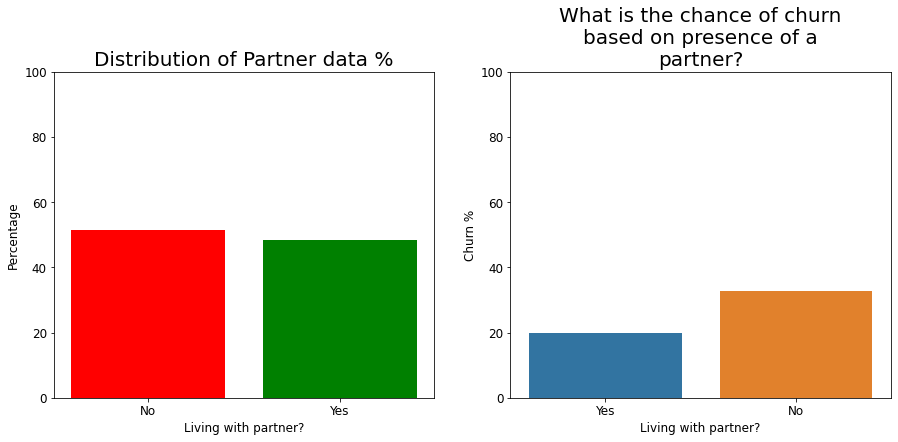

In [106]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of partner data
data = df["Partner"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Partner data %')
axes1.set_xlabel('Living with partner?')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on partner availibility
sns.barplot(x="Partner", y=df.ChurnVal*100, data=df, ci=None, ax=axes2)
axes2.set_xlabel('Living with partner?')
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on presence of a partner?', 30)))
axes2.set_ylim(0,100)

plt.show()

The dataset contains almost equal distribution of customer data - either living alone or with partner.
Customers living alone tend to churn more (~35% vs ~20%).

#### Type of contract

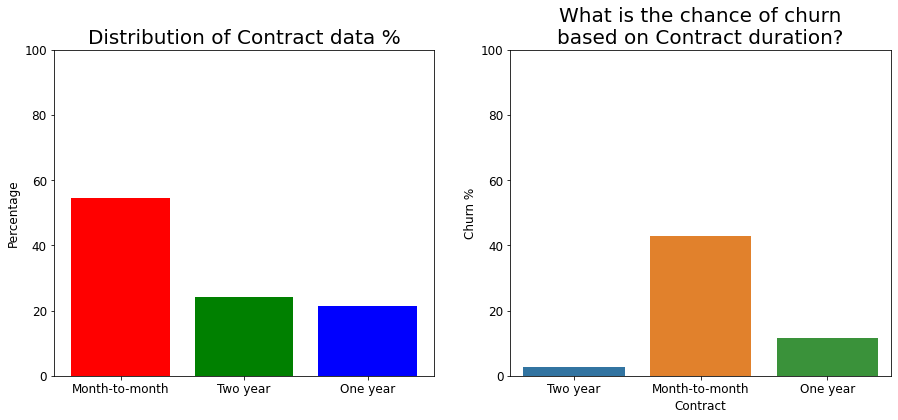

In [107]:
from textwrap import wrap
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Contract data
data = df["Contract"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Contract data %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Contract
sns.barplot(x="Contract", y=df.ChurnVal*100, data=df, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Contract duration?', 30)))
axes2.set_ylim(0,100)

plt.show()

The churn rate is high among monthly customers and least among 2-year contracted customers. While this is expected because of the contract duration, this is an alarming signal for the company since they should try to retain contracted customers and bring the churn rate to near zero, in addition to spending effort on month-to-month customers.



### Conclusions

Variables that can be ignored:
- Gender
- PhoneService
- MultipleLines
- InternetService 
- OnlineSecurity 
- OnlineBackup 
- DeviceProtection 
- TechSupport 
- StreamingTV 
- StreamingMovies


Important evidences we would want to work on:
- Retaining newly arrived customers
- Retaining month-to-month contracts customers
- Retaining SeniorCitizens customers